In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_csv("./resource/Iris.csv") #load the dataset


In [63]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [64]:
iris.drop('Id',axis=1,inplace=True)

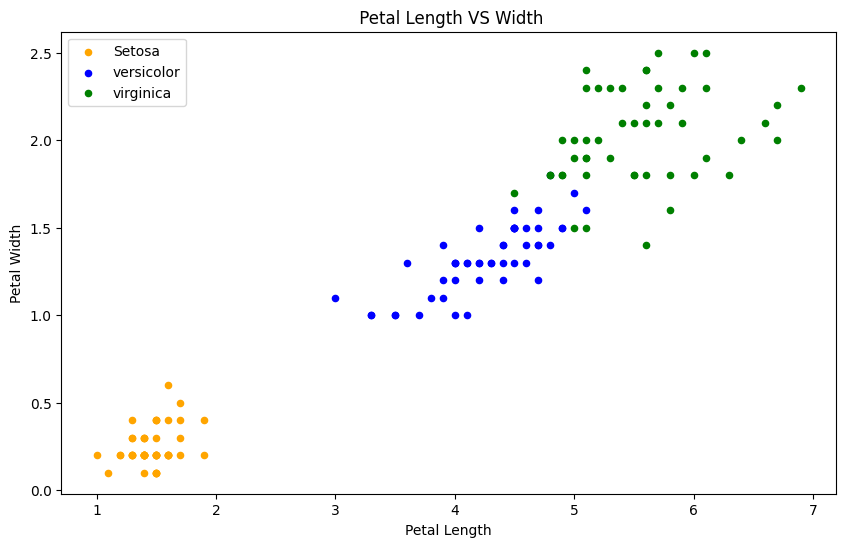

In [179]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [66]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.linear_model import LinearRegression  #for Support Vector Machine (SVM) Algorithm
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy

### BT1: CHẠY MẪU

#### Logistic Regression
 

In [170]:

# split data train test
train, test = train_test_split(iris, test_size = 0.3)

train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(train_X,train_y)
predictionLogistic = modelLogistic.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predictionLogistic,test_y))

The accuracy of the Logistic Regression is 0.9333333333333333


### BT2 chỉ lấy cột petal length, dùng logistic regression để phân loại 3 loại hoa. Hãy nhận xét xem so với cách 1 thì cách 2 có kq ntnt

In [218]:
# split data train test
train, test = train_test_split(iris, test_size = 0.3)

train_X = train[['PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(train_X,train_y)
predictionLogistic = modelLogistic.predict(test_X)
print(predictionLogistic)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predictionLogistic,test_y))

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa']
The accuracy of the Logistic Regression is 0.9555555555555556


### BT3 linear lần 1, logistic lần 2

#### Linear

In [255]:
irisLinear = iris.copy()
irisLinear['Species'] = irisLinear['Species'].replace({'Iris-setosa': 1,
                                                       'Iris-versicolor':0,
                                                       'Iris-virginica': 0,
                                                       })
irisLinear.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [417]:
train, test = train_test_split(irisLinear, test_size = 0.3)

train_X = train[['PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

modelLinear = LinearRegression()
modelLinear.fit(train_X,train_y)
prediction=modelLinear.predict(test_X)
print(prediction)
print('MSE Linear Regression is',metrics.mean_squared_error(test_y,prediction))
print('The accuracy of the Logistic Regression is',metrics.r2_score(test_y,prediction))

[ 0.01246564 -0.1324569   0.49554075 -0.1324569   0.44723324  0.44723324
 -0.5672245  -0.1324569  -0.37399445 -0.1324569  -0.47060947 -0.18076441
  0.49554075  0.06077315 -0.1324569   0.44723324 -0.08414938  0.44723324
  0.44723324 -0.47060947 -0.42230196 -0.18076441 -0.51891698  0.44723324
 -0.22907192 -0.18076441  0.44723324  0.44723324 -0.32568694  0.44723324
  0.39892573  0.06077315 -0.47060947 -0.42230196  0.44723324 -0.22907192
  0.44723324 -0.32568694  0.44723324  0.35061821  0.44723324  0.49554075
 -0.08414938 -0.08414938 -0.18076441]
MSE Linear Regression is 0.6249608397543855
The accuracy of the Logistic Regression is -0.08537367110002658


#### Logistic

In [243]:
irisLogistic = iris.loc[(iris['Species']=='Iris-versicolor') | (iris['Species']=='Iris-virginica')]
irisLogistic.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [408]:
# split data train test
train, test = train_test_split(irisLogistic, test_size = 0.3)

train_X = train[['PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(train_X,train_y)
predictionLogistic = modelLogistic.predict(test_X)
print(predictionLogistic)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predictionLogistic,test_y))


['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']
The accuracy of the Logistic Regression is 0.8666666666666667
